In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# SVM para clasificación

Vamos a considerar el dataset del vino:

Tenemos 13 features para nuestro vino:



        Alcohol

        Malic acid

        Ash

        Alcalinity of ash

        Magnesium

        Total phenols

        Flavanoids

        Nonflavanoid phenols

        Proanthocyanins

        Color intensity

        Hue

        OD280/OD315 of diluted wines

        Proline


Y tres clases.

In [2]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)
print(X.shape, y.shape)

(178, 13) (178,)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

El dataset está más o menos balanceado

In [4]:
print(np.sum(y_train==0)/len(y_train),np.sum(y_train==1)/len(y_train),np.sum(y_train==2)/len(y_train))

0.33098591549295775 0.3873239436619718 0.28169014084507044


In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

En este caso, tenemos tres clases. Para clasificar, necesitamos definir una estrategia de clasificación. Hay dos posibles estrategias relevantes para `SVC`:



*   Uno contra Todos (One vs Rest): Entrenamos un clasificador por clase. Para el clasificador $k$, los miembros de la clase $k$ son +1 y todo el resto son -1. Por lo tanto, la función de decisión regresa $K$ valores para cada sample, obteniendo una matriz de `(nsamples, nclasses)`. Este es el que usa `LinearSVC`. Tiene el problema de que puede ser inconsistente y que hay que corregir el hecho de que cada clasificador trabaja con datasets desbalanceados. Usualmente, se asigna la clase como la que tiene el máximo valor de $y_{k}$.
*   Uno contra Uno (One vs One): Entrenamos un clasificador para distinguir entre dos clases $i$, $j$ para todas las combinaciones posibles. Para $K$ clases, hay $\frac{K(K-1)}{2}$ combinaciones posibles y por lo tanto la función de decisión va a ser una matriz de dimensión `(nsamples,nclasses*(nclasses-1)/2)`. El orden de las clases de 0 a K-1 es: “0 vs 1”, “0 vs 2” , … “0 vs K-1”, “1 vs 2”, “1 vs 3”, “1 vs K-1”, . . . “K-2 vs K-1”. Utilizando el comando `modelo.decision_function_shape = 'ovr'` podemos transformar nuestra función de decisión en una matriz de `(nsamples, nclasses)`. Este método es el que utiliza `SVC`.



In [6]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
modelo_linear_svc=LinearSVC(penalty='l2', loss='hinge',max_iter=1000,multi_class='ovr',C=1.0)
modelo_linear_svc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [8]:
y_pred_linear_svc = modelo_linear_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred_linear_svc))
print(accuracy_score(y_test,y_pred_linear_svc))

[[12  0  0]
 [ 0 16  0]
 [ 0  0  8]]
1.0


In [9]:
linear_sv_index= np.abs(modelo_linear_svc.decision_function(X_train)) <= 1.0 + 1e-12
print(linear_sv_index.shape)

(142, 3)


In [20]:
SVC?

In [24]:
modelo_svc=SVC(kernel='linear',C=1.0,decision_function_shape='ovr')
modelo_svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
print(modelo_svc.decision_function(X_train).shape)
print(modelo_svc.predict(X_train).shape)

(142, 3)
(142,)


In [26]:
y_pred_svc = modelo_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred_svc))
print(accuracy_score(y_test,y_pred_svc))

[[12  0  0]
 [ 2 13  1]
 [ 0  0  8]]
0.9166666666666666


In [13]:
svc_index= np.abs(modelo_svc.decision_function(X_train)) <= 1.0 + 1e-12
print(svc_index.shape)

(142, 3)


Pero son otros support vectors!

In [18]:
np.sum(svc_index!=linear_sv_index)

250

Ejercicio: 

Ahora hagan lo mismo pero con el Iris dataset, usen dos features y grafiquen las fronteras de decisión y los support vectors. Exploren además otros kernels y optimicen los hiperparametros

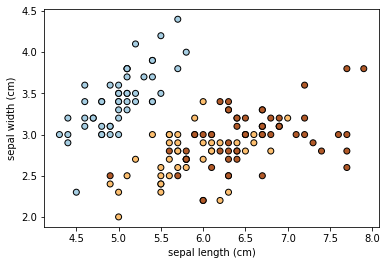

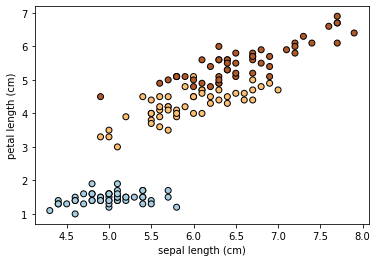

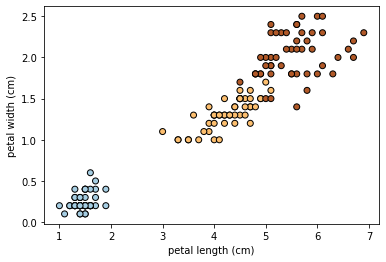

In [27]:
from sklearn import datasets
iris=datasets.load_iris()
X = iris.data
t = iris.target

#X = X[t > 0]
#t = t[t > 0]

# Plot also the training points
for pair in ([0, 1], [0, 2], [2, 3]):
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c=t, edgecolors='k', cmap=plt.cm.Paired)
  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])
  plt.show()

In [28]:
X_2d=X[:,[2,3]]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_2d,t,test_size=0.2)

Text(0, 0.5, 'petal width (cm)')

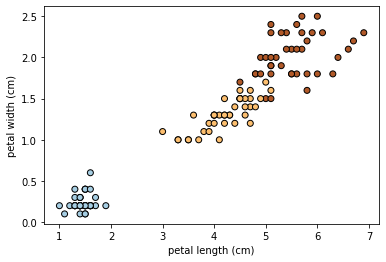

In [31]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

In [39]:
from sklearn.pipeline import Pipeline
import scipy.stats as st
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

modelo_lineal=Pipeline([('scaler',StandardScaler()),('linear_svc',LinearSVC(penalty='l2',loss='hinge',max_iter=100000))])

params={'linear_svc__C':st.loguniform(a=1,b=1e2)}

grilla=RandomizedSearchCV(modelo_lineal,params,n_iter=50,scoring='accuracy',cv=10)

grilla.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('linear_svc',
                                              LinearSVC(C=1.0,
                                                        class_weight=None,
                                                        dual=True,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        loss='hinge',
                                                        max_iter=100000,
                                                        multi_

In [40]:
grilla.best_params_

{'linear_svc__C': 63.55207885481721}

In [41]:
mejor_modelo_lineal=grilla.best_estimator_

In [42]:
mejor_modelo_lineal.decision_function(X_train).shape

(120, 3)

In [73]:
mejor_modelo_lineal.decision_function(X_train[:10])

array([[  1.99206918,  -1.30931761, -14.53745655],
       [ -3.02980784,  -0.17786364,  -1.30763065],
       [ -4.20010524,   0.10703478,   1.76907493],
       [  1.72549934,  -1.47211614, -13.76830045],
       [ -2.88157269,  -0.48718125,  -1.61532556],
       [  1.45892949,  -1.63491467, -12.99914435],
       [  1.99206918,  -1.30931761, -14.53745655],
       [ -6.20001263,   0.68497136,   6.99948254],
       [  1.9179516 ,  -1.1546588 , -14.3836091 ],
       [ -1.62284106,   0.48147022,  -5.30725863]])

In [43]:
mejor_modelo_lineal.predict(X_train).shape

(120,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  if __name__ == '__main__':


Text(0, 0.5, 'petal width (cm)')

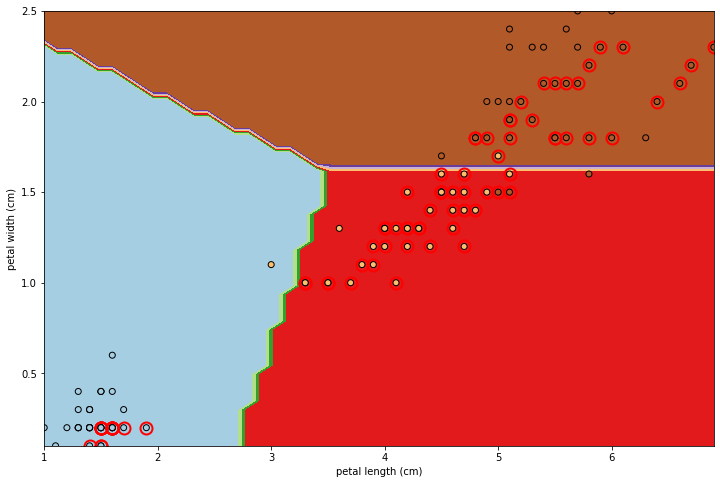

In [66]:
fig = plt.figure(figsize=(12,8))
xvals1 = np.linspace(np.min(X_train[:,0]),np.max(X_train[:,0]),50)#grilla de valores de x1
xvals2 = 10703478np.linspace(np.min(X_train[:,1]),np.max(X_train[:,1]),50)# grilla de valores de x2
X1, X2 = np.meshgrid(xvals1,xvals2)#armo las combinaciones posibles
Z=np.asarray([mejor_modelo_lineal.predict(np.asarray([el[0],el[1]]).reshape(1,-1)) for el in np.c_[X1.ravel(),X2.ravel()]]).reshape(X1.shape)# para cada una de esas combinaciones calculo la asignación de clase
isv_1 = np.abs(mejor_modelo_lineal.decision_function(X_train)[:,0])<= 1.0 + 1e-12 #support vectors y0
isv_2 = np.abs(mejor_modelo_lineal.decision_function(X_train)[:,1])<= 1.0 + 1e-12# support vectors y1
isv_3 = np.abs(mejor_modelo_lineal.decision_function(X_train)[:,2])<= 1.0 + 1e-12# support vectors y2
plt.contourf(xvals1,xvals2,Z,edgecolors='k', cmap=plt.cm.Paired)#dibujo las asignaciones
#plt.colorbar()
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, edgecolors='k', cmap=plt.cm.Paired)# dibujo los datos
#plt.plot(X_train[isv_1,0],X_train[isv_1,1], 'o',color='blue', ms=12, mfc='None', mew=2)# dibujo los sv0
plt.plot(X_train[isv_2,0],X_train[isv_2,1], 'ro', ms=12, mfc='None', mew=2)# dibujo los sv1
#plt.plot(X_train[isv_3,0],X_train[isv_3,1], 'o', color='brown', ms=12, mfc='None', mew=2)# dibujo los sv1
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

In [71]:
print(mejor_modelo_lineal['linear_svc'].coef_.shape)
print(mejor_modelo_lineal['linear_svc'].intercept_.shape)

(3, 2)
(3,)


In [67]:
y_pred_train=mejor_modelo_lineal.predict(X_train)
print(confusion_matrix(y_train,y_pred_train))

[[40  0  0]
 [ 1 38  2]
 [ 0  3 36]]


In [101]:
modelo_svc_lineal=Pipeline([('scaler',StandardScaler()),('SVC_linear',SVC(kernel='linear',max_iter=100000,decision_function_shape='ovr'))])

params={'SVC_linear__C':st.loguniform(a=1e1,b=1e2)}

grilla=RandomizedSearchCV(modelo_svc_lineal,params,n_iter=50,scoring='accuracy',cv=10)

grilla.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('SVC_linear',
                                              SVC(C=1.0, break_ties=False,
                                                  cache_size=200,
                                                  class_weight=None, coef0=0.0,
                                                  decision_function_shape='ovr',
                                                  degree=3, gamma='scale',
                                                  kernel='linear',
                                                  max_iter=100000,
                                                  pr

In [102]:
grilla.best_params_

{'SVC_linear__C': 10.034504867277311}

In [103]:
mejor_modelo_SVC_lineal=grilla.best_estimator_

In [104]:
mejor_modelo_SVC_lineal.decision_function(X_train[:10])

array([[ 2.25645753,  1.30462327, -0.31103131],
       [-0.26683979,  2.26895181,  0.9529247 ],
       [-0.2837893 ,  1.24285004,  2.25090875],
       [ 2.24939139,  1.30359911, -0.30982841],
       [-0.26337904,  2.27038089,  0.88453354],
       [ 2.24089477,  1.30249917, -0.30848834],
       [ 2.25645753,  1.30462327, -0.31103131],
       [-0.298859  ,  1.0448573 ,  2.29829552],
       [ 2.25419431,  1.30447721, -0.31075522],
       [-0.22454374,  2.28726582,  0.73111952]])

In [92]:
mejor_modelo_SVC_lineal['SVC_linear'].support_.shape

(15,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  import sys


Text(0, 0.5, 'petal width (cm)')

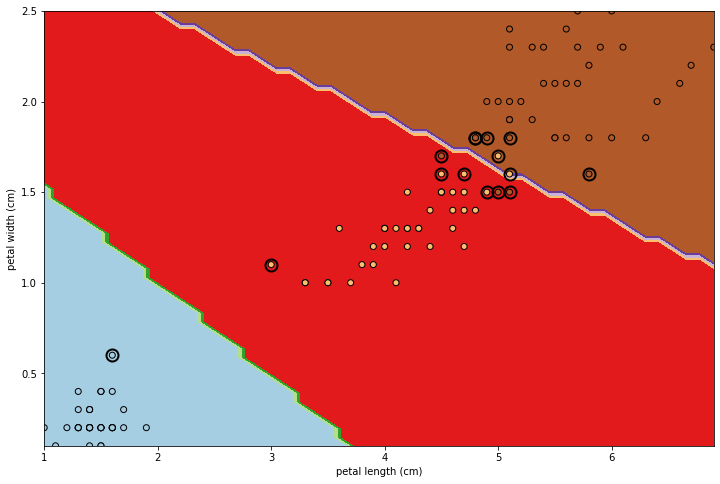

In [93]:
fig = plt.figure(figsize=(12,8))
xvals1 = np.linspace(np.min(X_train[:,0]),np.max(X_train[:,0]),50)#grilla de valores de x1
xvals2 = np.linspace(np.min(X_train[:,1]),np.max(X_train[:,1]),50)# grilla de valores de x2
X1, X2 = np.meshgrid(xvals1,xvals2)#armo las combinaciones posibles
Z=np.asarray([mejor_modelo_SVC_lineal.predict(np.asarray([el[0],el[1]]).reshape(1,-1)) for el in np.c_[X1.ravel(),X2.ravel()]]).reshape(X1.shape)# para cada una de esas combinaciones calculo la asignación de clase
isv = mejor_modelo_SVC_lineal['SVC_linear'].support_ #support vectors
plt.contourf(xvals1,xvals2,Z,edgecolors='k', cmap=plt.cm.Paired)#dibujo las asignaciones
#plt.colorbar()
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, edgecolors='k', cmap=plt.cm.Paired)# dibujo los datos
plt.plot(X_train[isv,0],X_train[isv,1], 'o', ms=12, mfc='None', mec='k',mew=2)# dibujo los sv
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

In [94]:
y_pred_train_bis=mejor_modelo_SVC_lineal.predict(X_train)
print(confusion_matrix(y_train,y_pred_train_bis))

[[40  0  0]
 [ 0 39  2]
 [ 0  3 36]]


# SVM para regresión

También podemos utilizar Support Vector Machines para Regresión.

In [105]:
from sklearn.svm import LinearSVR, SVR

Mientras que en clasificación la idea era separar las clases con el margen, en regresión se busca lo opuesto: encontrar los margenes dentro de los cuales se encuentra el target. Tenemos entonces dos hiperparametros $C$ que controla el peso relativo de los errores tal como antes y $\epsilon$ que controla el tamaño del margen dentro del cual no nos molesta equivocarnos.

Veamoslo con un ejemplo sencillo:

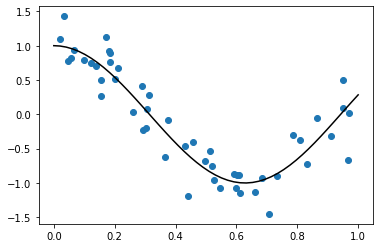

In [106]:
np.random.seed(42)
N = 50
X = np.random.rand(N)
y = np.cos(5*X)+0.3*np.random.randn(N)
xvals=np.linspace(0.0,1.0,50)
plt.plot(xvals,np.cos(5*xvals),color='black')
plt.scatter(X,y)

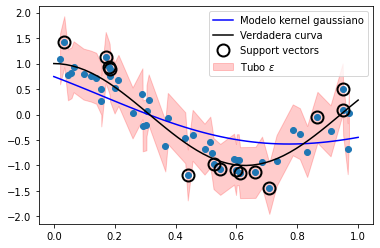

In [119]:
C=1.0
epsilon=0.5
modelo=SVR(kernel='rbf',gamma='auto',C=C,epsilon=epsilon)
modelo.fit(X.reshape(-1,1),y)
plt.plot(xvals,modelo.predict(xvals.reshape(-1,1)),color='blue', label='Modelo kernel gaussiano')
plt.plot(xvals,np.cos(5*xvals),color='black', label='Verdadera curva')
idsorted=np.argsort(X)
plt.fill_between(X[idsorted],y[idsorted]-epsilon,y[idsorted]+epsilon,color='red',alpha=0.2, label='Tubo $\epsilon$')
plt.scatter(X,y)
isv = modelo.support_
plt.plot(X[isv], y[isv], 'o', ms=12, mfc='None', mec='k', mew=2, label='Support vectors')
plt.legend(loc='upper right')

Exploren los distintos kernels, optimizando los hiperparametros, con el dataset del parcial:

In [ ]:
if 'google.colab' in sys.modules:
    #Si estas en Colab, ejecuta esto primero:
    !wget https://raw.githubusercontent.com/IAI-UNSAM/ML-UNSAM/master/datasets/dataset_regression.txt
data = np.loadtxt('dataset_regresion.txt')
X=data[:,:2]
t=data[:,2]

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Longitud')

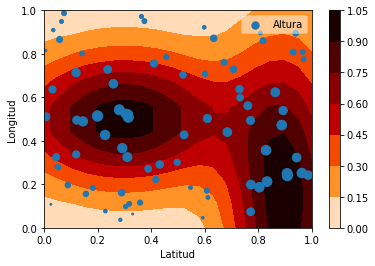

In [ ]:
def tfunc(x1,x2):
  r1 = np.sqrt(((x1-0.3)/0.4)**2+((x2-0.5)/0.3)**2)
  r2 = np.sqrt(((x1-0.9)/0.2)**2+((x2-0.1)/0.7)**2)
  return np.exp(-r1**2)+np.exp(-r2**2)
x1=np.linspace(0.0,1.0,20)
x2=np.linspace(0.0,1.0,10)
z=tfunc(x1[np.newaxis,:],x2[:,np.newaxis])
plt.contourf(x1,x2,z,cmap='gist_heat_r')
plt.colorbar()
plt.scatter(X[:,0],X[:,1],s=100*t,label='Altura')
plt.legend(loc='upper right',framealpha=0.5)
plt.xlabel('Latitud')
plt.ylabel('Longitud')

Y la función para graficar a la que hay que agregarle los support vectors:

In [ ]:
x1=np.linspace(0.0,1.0,20)# grilla en latitud
x2=np.linspace(0.0,1.0,10)# grilla en longitud
X1, X2 = np.meshgrid(x1,x2)
elements = np.c_[X1.ravel(),X2.ravel()]# junto todas las combinaciones posibles de mi grilla
z=modelo.predict(elements).reshape(X1.shape)#aca va el modelo
plt.contourf(x1,x2,z,cmap='gist_heat_r')
plt.colorbar()
plt.scatter(X_train[:,0],X_train[:,1],s=100*t_train,label='Altura')
plt.legend(loc='upper right',framealpha=0.5)
plt.xlabel('Latitud')
plt.ylabel('Longitud')